<h1>Data Preprocessing</h1>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

<h2>Model Clinical dataset:</h2>
<ul>
    <li>Data of People from age 13-100</li>
    <li>2 Categories : Younger people->13-63 and Older people->64-100</li>
    <li>Younger People : with Disease->5% and without Disease->95%</li>
    <li>Older People : with Disease->95% and without Disease->5%</li>
</ul>

In [3]:
# Creating Dataset
# 5% of younger individuals(13 - 64) have disease and 5% of older individuals don't have disease
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

# remaining of younger dont have disease and of older have disease
for i in range(950):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# Shuffle Data
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
# MinMaxScaler scales all data either in the range of [0,1] mostly or [-1,1] in case of any negative values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

<h1>Sequential Model

<h2>Model Creation</h2>

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import load_model, model_from_json

In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


<h2>Training Model

In [10]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Fit input Data
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
200/200 - 2s - loss: 0.6747 - accuracy: 0.5315
Epoch 2/30
200/200 - 0s - loss: 0.6511 - accuracy: 0.6005
Epoch 3/30
200/200 - 0s - loss: 0.6276 - accuracy: 0.6445
Epoch 4/30
200/200 - 0s - loss: 0.5996 - accuracy: 0.7015
Epoch 5/30
200/200 - 0s - loss: 0.5664 - accuracy: 0.7575
Epoch 6/30
200/200 - 0s - loss: 0.5356 - accuracy: 0.7885
Epoch 7/30
200/200 - 0s - loss: 0.5059 - accuracy: 0.8140
Epoch 8/30
200/200 - 0s - loss: 0.4780 - accuracy: 0.8365
Epoch 9/30
200/200 - 0s - loss: 0.4519 - accuracy: 0.8530
Epoch 10/30
200/200 - 0s - loss: 0.4281 - accuracy: 0.8665
Epoch 11/30
200/200 - 0s - loss: 0.4065 - accuracy: 0.8805
Epoch 12/30
200/200 - 0s - loss: 0.3875 - accuracy: 0.8835
Epoch 13/30
200/200 - 0s - loss: 0.3712 - accuracy: 0.8970
Epoch 14/30
200/200 - 0s - loss: 0.3569 - accuracy: 0.9060
Epoch 15/30
200/200 - 0s - loss: 0.3449 - accuracy: 0.9115
Epoch 16/30
200/200 - 0s - loss: 0.3346 - accuracy: 0.9160
Epoch 17/30
200/200 - 0s - loss: 0.3259 - accuracy: 0.9125
Epoch 

<h2> Validation of Model

<h3>2 Ways of fitting validation set</h3><br>
<b>1. Not Part of training set :</b><br>
    model.fit(<br>
        ...<br>
        validation_data=valid_set<br>
        ...<br>
    )<br>
<b>2. Split from training set:</b><br>
    model.fit(<br>
        ...<br>
        validation_split=0.1<br>
        ...<br>
    )<br>

In [12]:
# We use method 2
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
180/180 - 1s - loss: 0.2710 - accuracy: 0.9333 - val_loss: 0.3334 - val_accuracy: 0.9300
Epoch 2/30
180/180 - 0s - loss: 0.2698 - accuracy: 0.9333 - val_loss: 0.3329 - val_accuracy: 0.9300
Epoch 3/30
180/180 - 0s - loss: 0.2685 - accuracy: 0.9300 - val_loss: 0.3340 - val_accuracy: 0.9350
Epoch 4/30
180/180 - 0s - loss: 0.2672 - accuracy: 0.9339 - val_loss: 0.3336 - val_accuracy: 0.9350
Epoch 5/30
180/180 - 0s - loss: 0.2662 - accuracy: 0.9339 - val_loss: 0.3333 - val_accuracy: 0.9350
Epoch 6/30
180/180 - 0s - loss: 0.2654 - accuracy: 0.9344 - val_loss: 0.3351 - val_accuracy: 0.9350
Epoch 7/30
180/180 - 0s - loss: 0.2644 - accuracy: 0.9333 - val_loss: 0.3342 - val_accuracy: 0.9350
Epoch 8/30
180/180 - 0s - loss: 0.2635 - accuracy: 0.9339 - val_loss: 0.3336 - val_accuracy: 0.9350
Epoch 9/30
180/180 - 0s - loss: 0.2628 - accuracy: 0.9339 - val_loss: 0.3325 - val_accuracy: 0.9350
Epoch 10/30
180/180 - 1s - loss: 0.2620 - accuracy: 0.9339 - val_loss: 0.3302 - val_accuracy: 0.9350

<h2>Validation

<h4>Preprocess Test Data

In [13]:
test_labels = []
test_samples = []

In [14]:
# Creating Dataset
# 5% of younger individuals(13 - 64) have disease and 5% of older individuals don't have disease
for i in range(20):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

# remaining of younger dont have disease and of older have disease
for i in range(180):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [15]:
# Shuffle Data
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [16]:
scaled_test_sampled = scaler.fit_transform(test_samples.reshape(-1,1))

<h3>Predict

In [17]:
predictions = model.predict(
    x=scaled_test_sampled,
    batch_size=10,
    verbose=0
)

In [18]:
rounded_predictions=np.argmax(predictions, axis=-1)

<h4>Confusion Matrix

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [21]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues
                         ):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion Matrix")
    else:
        print("Conusion Matrix without Normalization")
        
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color='white' if cm[i, j] > thresh else "black"
                )
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

Conusion Matrix without Normalization
[[175  25]
 [ 19 181]]


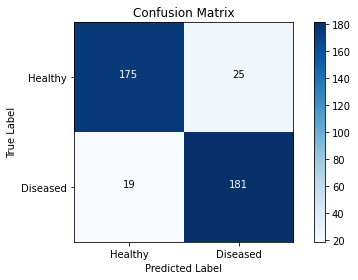

In [22]:
cm_plot_labels=['Healthy','Diseased']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [23]:
acc=sum(cm.diagonal())/sum(sum(cm))*100
print("Accuracy = "+str(acc)+"%")

Accuracy = 89.0%


<h1>Save and Load a Model

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


<h2>Method 1 (model.save())</h2><br>
<b>This method saves : </b>
<ul>
    <li>Architechture of the model, allowing it to recreate</li>
    <li>Weights of the model</li>
    <li>Training Configuration</li>
    <li>State of the Optimizer, allowing to resume training exactly where we left off  

In [26]:
model.save('models/medical_model.h5')

In [30]:
new_model = load_model('models/medical_model.h5')

In [31]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [33]:
new_model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 16) dtype=float32, numpy=
 array([[-0.06097847, -0.5744474 ,  0.31425822, -0.07675493, -0.56644714,
          0.71834266, -0.1383143 , -0.03267903, -0.17230266, -0.05991179,
         -0.17764425, -0.06403226,  0.5990359 , -0.12686527,  0.7047308 ,
          0.54672915]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([ 0.        ,  0.        ,  0.0343997 ,  0.        ,  0.        ,
        -0.16254622,  0.        ,  0.23258129,  0.        ,  0.        ,
         0.        ,  0.        , -0.1749567 ,  0.        , -0.13785748,
        -0.16551727], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(16, 32) dtype=float32, numpy=
 array([[ 0.18796787, -0.08947212, -0.24331653,  0.14080283, -0.00174403,
         -0.03459379, -0.16708274,  0.34929076, -0.02473423,  0.10970446,
          0.17508939, -0.15510486,  0.26269564,  0.14357468,  0.19396576,
         -0.14173657, -0.12334923,  0.32635435,  0.186066

<h2>Method 2(model.to_json())</h2><br>
If we only need to save the architecture of a model, and not it's weights or it's training configuration, we can use the following function to save the architechture  

In [35]:
json_string = model.to_json()

In [36]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [39]:
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


<h2>Method 3(model.save_weights())</h2><br>
If we only need to save the weights of a model we can use the following function.

In [40]:
model.save_weights('models/medical_model_weights.h5')

In [41]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [42]:
model2.load_weights('models/medical_model_weights.h5')

In [43]:
model2.get_weights()

[array([[-0.06097847, -0.5744474 ,  0.31425822, -0.07675493, -0.56644714,
          0.71834266, -0.1383143 , -0.03267903, -0.17230266, -0.05991179,
         -0.17764425, -0.06403226,  0.5990359 , -0.12686527,  0.7047308 ,
          0.54672915]], dtype=float32),
 array([ 0.        ,  0.        ,  0.0343997 ,  0.        ,  0.        ,
        -0.16254622,  0.        ,  0.23258129,  0.        ,  0.        ,
         0.        ,  0.        , -0.1749567 ,  0.        , -0.13785748,
        -0.16551727], dtype=float32),
 array([[ 0.18796787, -0.08947212, -0.24331653,  0.14080283, -0.00174403,
         -0.03459379, -0.16708274,  0.34929076, -0.02473423,  0.10970446,
          0.17508939, -0.15510486,  0.26269564,  0.14357468,  0.19396576,
         -0.14173657, -0.12334923,  0.32635435,  0.18606612, -0.30216146,
         -0.05424756,  0.33895794, -0.05206552,  0.2541006 , -0.10293189,
          0.32644656,  0.02550027, -0.26361245, -0.12113999, -0.0117394 ,
         -0.01120314,  0.0053159 ],
 